## 단일계수 t-검정

**정규화된 모수 오차 $\dfrac{\hat{w_i}}{se_i}$**를 검정통계량 $t$로 이용한 t-검정을 통해 $w_i$가 0인지 아닌지에 대한 검정이 가능하다.

$$H_0 : w_i = 0$$

귀무가설은 가중치가 0이라는 것이다. 즉, 특정 독립변수가 종속변수에 실제로 영향을 미치는지 아닌지에 대해 확인할 수 있는 검정이다.

보스턴 주택 가격 데이터를 이용해 회귀분석을 실시하고 각 독립변수에 대한 t-검정 결과를 확인해보자.

In [20]:
import statsmodels.api as sm
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df.head(3)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [21]:
result = sm.OLS(dfy, dfX).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 19 Aug 2021   Prob (F-statistic):          6.72e-135
Time:                        12:42:30   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

INDUS의 경우 t검정에 대한 유의확률이 0.738로 귀무가설을 기각한다. 따라서 실제 y값에 영향을 미치는 독립변수가 아니라는 것이다.

AGE의 경우도 마찬가지로 유의확률이 0.958로 귀무가설을 기각한다.

실제로 부분회귀 플롯을 이용해 AGE와 INUDS에 대해 상관관계를 시각화하면 종속변수에 대한 상관관계가 없는것을 확인할 수 있다.

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


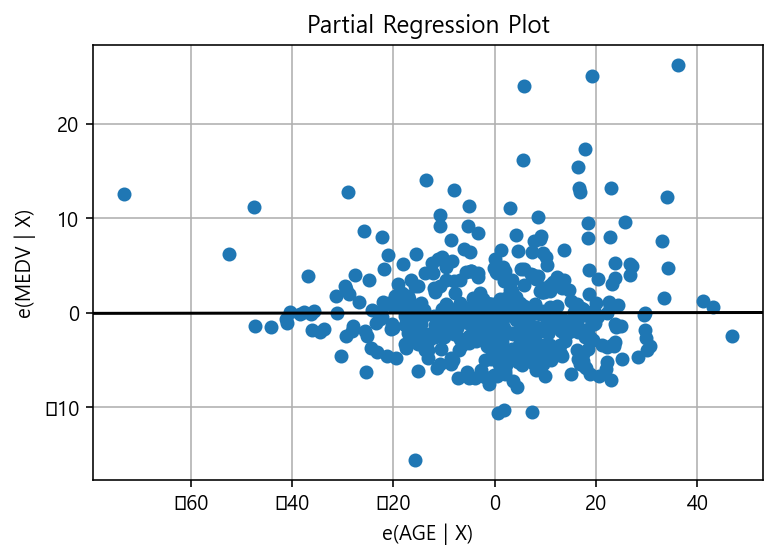

In [22]:
others = list(set(df.columns).difference(set(['MEDV','AGE'])))
p, resids = sm.graphics.plot_partregress(
    'MEDV', 'AGE', others, data=df, obs_labels=False, ret_coords=True)

plt.grid()
plt.show()

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


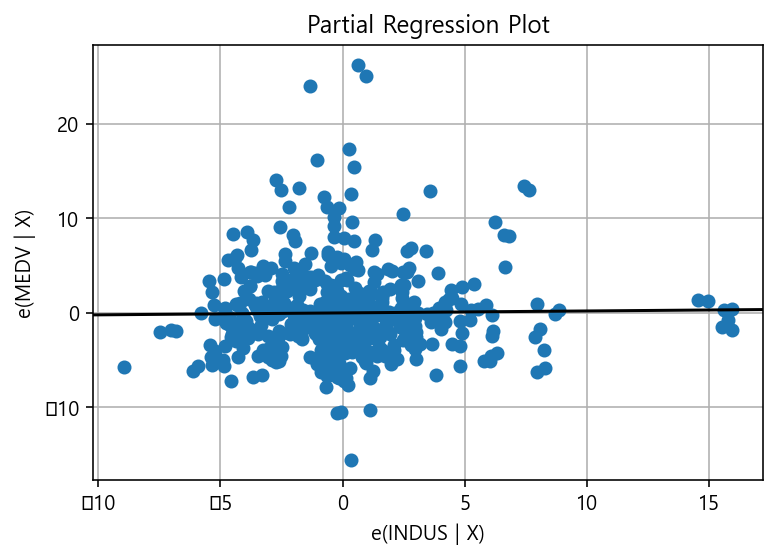

In [23]:
others = list(set(df.columns).difference(set(['MEDV','INDUS'])))
p, resids = sm.graphics.plot_partregress(
    'MEDV', 'INDUS', others, data=df, obs_labels=False, ret_coords=True)

plt.grid()
plt.show()

## t_test의 귀무가설 설정

In [25]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(
    n_samples = 100, n_features = 1, noise = 20, coef=True
)

dfX0 = pd.DataFrame(X0, columns=['X1'])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=['y'])

model = sm.OLS(dfy, dfX)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     265.8
Date:                Thu, 19 Aug 2021   Prob (F-statistic):           1.15e-29
Time:                        12:43:18   Log-Likelihood:                -454.86
No. Observations:                 100   AIC:                             913.7
Df Residuals:                      98   BIC:                             918.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5866      2.310      1.986      0.0

위 summary 결과를 확인해보면 X1의 coef값이 43.1341이라는 것을 확인할 수 있다.

그런데 분석을 의뢰한 고객의 입장에서 봤을 때 43.1341이라는 값보다는 40이라는 값으로 분석결과를 보는 것이 더 좋을 것이다.

이러한 경우 X1의 가중치를 40으로 써도 되는지에 대한 귀무가설을 t_test 메소드를 이용해 설정할 수 있다.

$$H_0 : w_1 = 40$$

In [26]:
# 귀무가설 : X1의 계수값은 40이다.

print(result.t_test("X1 = 40"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            43.1341      2.646      1.185      0.239      37.884      48.384


결과를 확인해보면 P-value가 0.239로 귀무가설을 채택할 수 있다. 즉, $w_1$를 40으로 놓고 봐도 된다는 것이다.

이번에는 t_test 메소드를 이용해 두 독립변수의 계수값을 비교해보자.

## 두 독립변수의 계수값 비교

In [27]:
import datetime
from calendar import isleap

df_nottem = sm.datasets.get_rdataset("nottem").data 

def convert_partial_year(number):
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

df_nottem["date0"] = df_nottem[["time"]].applymap(convert_partial_year)
df_nottem["date"] = pd.DatetimeIndex(df_nottem["date0"]).round('60min') + datetime.timedelta(seconds=3600*24)
df_nottem["month"] = df_nottem["date"].dt.strftime("%m").astype('category')
del df_nottem["date0"], df_nottem["date"]

model_nottem = sm.OLS.from_formula("value ~ C(month) + 0", df_nottem)
result_nottem = model_nottem.fit()
print(result_nottem.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Thu, 19 Aug 2021   Prob (F-statistic):          2.96e-125
Time:                        12:46:51   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

1월과 2월이 같다는 귀무가설을 설정하고 t_test를 진행하면 p_value는 0.491로 두 범주형 독립변수는 사실상 같다고 봐도 된다는 것이다.

즉, 1월과 2월을 구분하는 것이 사실상 의미가 없다는 뜻이 된다.

In [28]:
print(result_nottem.t_test("C(month)[01] = C(month)[02]"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.5050      0.732      0.690      0.491      -0.937       1.947


2월과 3월의 경우 귀무가설을 기각하며 구분이 필요한 것을 확인할 수 있다.

In [29]:
print(result_nottem.t_test("C(month)[03] = C(month)[02]"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             3.0050      0.732      4.105      0.000       1.563       4.447


## 회귀분석 F-검정

회귀분석 F검정은 전체 회귀 계수가 모두 의미가 있는지를 확인하는 검정이다.

$$H_0 : w_0 = w_1 = ... = w_{k-1} = 0$$

귀무가설은 모든 독립변수가 종속변수에 아무런 영향을 미치지 않는다는 것이다.

현실적으로 이 귀무가설이 채택되는 경우는 없다고 봐도 무방하다.

하지만 귀무가설이 어느정도의 수치고 기각 되었느냐는 비교할 수 있다.

즉, 귀무가설이 기각된 정도를 통해 모델의 성능을 비교할 수 있게 된다.

보스턴 주택가격 데이터를 이용해 OLS 회귀분석을 진행한 report이다.

In [30]:
boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
result = sm.OLS(dfy, dfX).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 19 Aug 2021   Prob (F-statistic):          6.72e-135
Time:                        12:54:37   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

앞서 확인했던 종속변수에 영향을 미치지 않는 것으로 확인했던 INDUS, AGE를 포함하여 회귀분석을 진행했다.

그 결과 F검정의 p_value는 6.72e-135로 확인된다.

이번에는 INDUS, AGE 를 제외하여 회귀분석을 진행했고 F검정 p_value는 5.54e-137로 확인된다.